In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#df = pd.read_csv(r'Historical Crypto Prices', index_col=0)
df = pd.read_csv(r'gbm_data.csv', index_col=0)
#df.index = pd.to_datetime(df.index)
df

,Asset 1,Asset 2
0,103.349045,147.777531
1,116.135321,136.766205
2,122.702094,136.641925
3,131.342988,138.896226
4,139.824219,138.095571
...,...,...
247,80.132646,255.521812
248,74.975237,258.598115
249,73.869489,261.034380
250,74.888858,277.155312


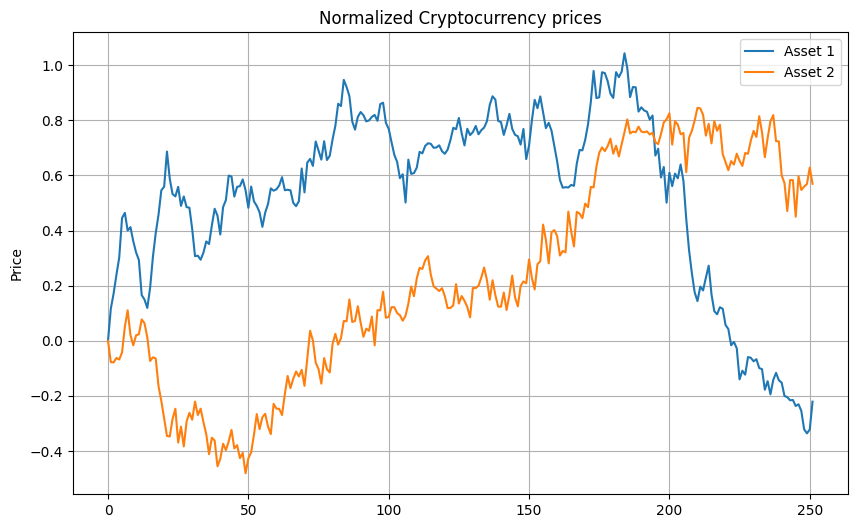

In [38]:
normalized_df = np.log(df / df.iloc[0])

normalized_df.plot(title="Normalized Cryptocurrency prices", figsize=(10, 6))
plt.grid()
plt.ylabel("Price")
plt.show()

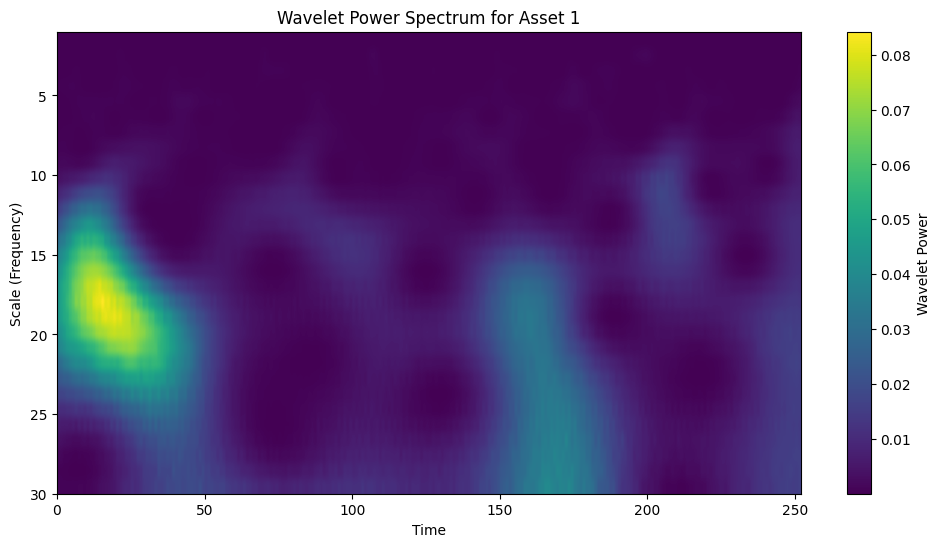

In [39]:
import pywt

crypto = normalized_df['Asset 1']

wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 31)
coefficients, frequencies = pywt.cwt(crypto, scales, wavelet)

plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients)**2, aspect='auto', cmap='viridis',
           extent=[0, len(crypto), scales[-1], scales[0]])
plt.colorbar(label="Wavelet Power")
plt.title("Wavelet Power Spectrum for Asset 1")
plt.xlabel("Time")
plt.ylabel("Scale (Frequency)")
plt.show()
